In [1]:
import torch
from safetensors.torch import load_file

In [2]:
ct_movq_dict = dict(torch.load("/home/mlfavorfit/.cache/huggingface/hub/models--kandinsky-community--kandinsky-2-2-controlnet-depth/snapshots/4ecd717e8c9086cf4a16ca28b64894f70a42cd08/movq/diffusion_pytorch_model.bin"))
ct_unet_dict = dict(torch.load("/home/mlfavorfit/.cache/huggingface/hub/models--kandinsky-community--kandinsky-2-2-controlnet-depth/snapshots/4ecd717e8c9086cf4a16ca28b64894f70a42cd08/unet/diffusion_pytorch_model.bin"))

un_movq_dict = dict(load_file("/home/mlfavorfit/.cache/huggingface/hub/models--kandinsky-community--kandinsky-2-2-decoder-inpaint/snapshots/db790ad5cbcabed886f069ef2710774657621702/movq/diffusion_pytorch_model.safetensors"))
un_unet_dict = dict(load_file("/home/mlfavorfit/.cache/huggingface/hub/models--kandinsky-community--kandinsky-2-2-decoder-inpaint/snapshots/db790ad5cbcabed886f069ef2710774657621702/unet/diffusion_pytorch_model.safetensors"))

In [3]:
ct_movq = sorted([(cur, ct_movq_dict[cur].shape)for cur in ct_movq_dict], key=lambda x:x[0])
ct_unet = sorted([(cur, ct_unet_dict[cur].shape)for cur in ct_unet_dict], key=lambda x:x[0])
un_movq = sorted([(cur, un_movq_dict[cur].shape)for cur in un_movq_dict], key=lambda x:x[0])
un_unet = sorted([(cur, un_unet_dict[cur].shape)for cur in un_unet_dict], key=lambda x:x[0])

In [4]:
for ct, un in zip(ct_movq, un_movq):
    if ct != un: print("warn")

In [5]:
only_ct = []
common_ct_un = []
for name, shape in ct_unet:
    if name in un_unet_dict.keys():
        common_ct_un.append(name)
    else:
        only_ct.append(name)

In [6]:
for name in common_ct_un:
    if un_unet_dict[name].shape != ct_unet_dict[name].shape: print(name)

conv_in.weight


In [7]:
un_unet_dict["conv_in.weight"].shape

torch.Size([384, 9, 3, 3])

In [8]:
ct_unet_dict["conv_in.weight"].shape

torch.Size([384, 8, 3, 3])

In [9]:
for cur in only_ct:
    print(cur, ct_unet_dict[cur].shape)

add_embedding.input_hint_block.0.bias torch.Size([16])
add_embedding.input_hint_block.0.weight torch.Size([16, 3, 3, 3])
add_embedding.input_hint_block.10.bias torch.Size([96])
add_embedding.input_hint_block.10.weight torch.Size([96, 96, 3, 3])
add_embedding.input_hint_block.12.bias torch.Size([256])
add_embedding.input_hint_block.12.weight torch.Size([256, 96, 3, 3])
add_embedding.input_hint_block.14.bias torch.Size([4])
add_embedding.input_hint_block.14.weight torch.Size([4, 256, 3, 3])
add_embedding.input_hint_block.2.bias torch.Size([16])
add_embedding.input_hint_block.2.weight torch.Size([16, 16, 3, 3])
add_embedding.input_hint_block.4.bias torch.Size([32])
add_embedding.input_hint_block.4.weight torch.Size([32, 16, 3, 3])
add_embedding.input_hint_block.6.bias torch.Size([32])
add_embedding.input_hint_block.6.weight torch.Size([32, 32, 3, 3])
add_embedding.input_hint_block.8.bias torch.Size([96])
add_embedding.input_hint_block.8.weight torch.Size([96, 32, 3, 3])


In [10]:
import torch

# 기존 텐서의 모양과 새로운 모양 정의
old_shape = (384, 9, 3, 3)
new_shape = (384, 13, 3, 3)

# 새로운 텐서 생성 및 기존 텐서 값 복사
new_weight = torch.zeros(new_shape)  # 새로운 텐서를 모두 0으로 초기화
old_weight = un_unet_dict["conv_in.weight"]
new_weight[:, :old_shape[1], :, :] = old_weight

# 추가된 부분에 랜덤한 0으로 채우기
random_part = torch.zeros((new_shape[0], new_shape[1] - old_shape[1], new_shape[2], new_shape[3]))
new_weight[:, old_shape[1]:, :, :] = random_part

# 결과 확인
print(new_weight.shape)


torch.Size([384, 13, 3, 3])


In [11]:
un_unet_dict["conv_in.weight"] = new_weight

In [12]:
for cur in only_ct:
    un_unet_dict[cur] = ct_unet_dict[cur]

In [13]:
print(len(un_unet_dict))
print(un_unet_dict["conv_in.weight"].shape)

740
torch.Size([384, 13, 3, 3])


In [15]:
from safetensors.torch import save_file

save_file(un_unet_dict, "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-inpainting-controlnet/unet/diffusion_pytorch_model.safetensors")

In [15]:
temp_dict = load_file("/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-inpainting-controlnet/unet/diffusion_pytorch_model.safetensors")

In [16]:
print(len(temp_dict))
print(temp_dict["conv_in.weight"].shape)

740
torch.Size([384, 13, 3, 3])


In [1]:
from PIL import Image

def downgrade_image(img, bad_size=[64,64]):
    img = img.resize(bad_size).resize(img.size)
    return img

from utils import make_canny_condition

In [6]:
from glob import glob
from PIL import Image

fns = glob("/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_bad/images/*")

In [8]:
import os
from tqdm import tqdm

save_dir = "/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_bad/conditioning_images_canny"
for fn in tqdm(fns, total=len(fns)):
    img = Image.open(fn)
    bad_img = make_canny_condition(img)
    bad_img.save(os.path.join(save_dir, os.path.basename(fn)))

100%|██████████| 197967/197967 [46:24<00:00, 71.10it/s] 


In [28]:
import torch
temp_key = torch.load("/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-decoder/controlnet/ckpt_63000_0313/diffusion_pytorch_model.bin", map_location="cpu").keys()
temp_key = list(temp_key)

In [29]:
len(temp_key)

392

In [30]:
from safetensors.torch import load_file

key_list = list(load_file("/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-decoder/unet/diffusion_pytorch_model.safetensors").keys())

In [33]:
len([cur for cur in key_list if not cur.startswith("up")])

334

In [46]:
temp = 0
for key in key_list:
    if key in temp_key:
        temp+=1
        if "mid" in key:
            print(key)
temp

mid_block.resnets.0.conv1.bias
mid_block.resnets.0.conv1.weight
mid_block.resnets.0.conv2.bias
mid_block.resnets.0.conv2.weight
mid_block.resnets.0.norm1.bias
mid_block.resnets.0.norm1.weight
mid_block.resnets.0.norm2.bias
mid_block.resnets.0.norm2.weight
mid_block.resnets.0.time_emb_proj.bias
mid_block.resnets.0.time_emb_proj.weight
mid_block.resnets.1.conv1.bias
mid_block.resnets.1.conv1.weight
mid_block.resnets.1.conv2.bias
mid_block.resnets.1.conv2.weight
mid_block.resnets.1.norm1.bias
mid_block.resnets.1.norm1.weight
mid_block.resnets.1.norm2.bias
mid_block.resnets.1.norm2.weight
mid_block.resnets.1.time_emb_proj.bias
mid_block.resnets.1.time_emb_proj.weight


316

In [42]:
temp = 0
for key in key_list:
    if key not in temp_key:
        temp+=1
temp

408

In [27]:
len([cur for cur in key_list if not cur.startswith("up")]) + 50

384

In [1]:
import random
from PIL import Image
from PIL.ImageOps import expand

from diffusers.utils import make_image_grid
from utils import *

import torch
from diffusers import KandinskyV22PriorPipeline
from diffusers.pipelines.kandinsky2_2.pipline_kandinsky2_2_controlnet_split import KandinskyV22ControlnetPipeline

from diffusers.models.controlnet_kandinsky import ControlNetModel as ControlNetModelKandinsky


/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
decoder_model_path = "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-decoder"
prior_model_path = "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-prior"

controlnet_kandinsky = ControlNetModelKandinsky.from_pretrained(
    decoder_model_path, subfolder="controlnet/tile_from_sd15", torch_dtype=torch.float16,
).eval()

# prior_pipeline = KandinskyV22PriorPipeline.from_pretrained(
#     prior_model_path,
#     use_safetensors=True,
#     torch_dtype=torch.float16,
# )

# pipeline = KandinskyV22ControlnetPipeline.from_pretrained(
#     decoder_model_path,
#     controlnet=controlnet_kandinsky,
#     torch_dtype=torch.float16,
# )

The config attributes {'center_input_sample': False} were passed to ControlNetModel, but are not expected and will be ignored. Please verify your config.json configuration file.


ValueError: Cannot load <class 'diffusers.models.controlnet_kandinsky.ControlNetModel'> from /home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-decoder because the following keys are missing: 
 down_blocks.1.resnets.2.norm1.weight, down_blocks.0.attentions.2.transformer_blocks.0.attn2.to_out.0.weight, down_blocks.0.attentions.2.transformer_blocks.0.attn2.to_k.weight, down_blocks.1.attentions.2.transformer_blocks.0.ff.net.0.proj.weight, down_blocks.1.attentions.2.transformer_blocks.0.attn1.to_q.weight, down_blocks.1.attentions.2.transformer_blocks.0.norm3.weight, down_blocks.1.attentions.2.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.1.attentions.2.transformer_blocks.0.attn1.to_out.0.weight, down_blocks.0.attentions.2.transformer_blocks.0.attn2.to_q.weight, down_blocks.0.attentions.2.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.1.attentions.2.transformer_blocks.0.attn2.to_k.weight, down_blocks.2.attentions.2.transformer_blocks.0.ff.net.0.proj.weight, controlnet_down_blocks.15.bias, down_blocks.2.attentions.2.transformer_blocks.0.attn1.to_v.weight, down_blocks.0.resnets.2.norm1.bias, down_blocks.2.attentions.2.transformer_blocks.0.norm2.weight, down_blocks.1.resnets.2.time_emb_proj.weight, down_blocks.2.attentions.2.norm.weight, controlnet_down_blocks.15.weight, down_blocks.0.attentions.2.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.0.attentions.2.transformer_blocks.0.norm3.bias, down_blocks.3.resnets.2.conv1.bias, down_blocks.0.resnets.2.norm1.weight, down_blocks.1.resnets.2.conv2.bias, down_blocks.0.resnets.2.norm2.bias, down_blocks.2.resnets.2.norm1.weight, down_blocks.2.attentions.2.transformer_blocks.0.norm2.bias, down_blocks.0.resnets.2.conv2.weight, down_blocks.3.resnets.2.conv2.bias, down_blocks.2.attentions.2.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.2.attentions.2.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.1.attentions.2.transformer_blocks.0.norm2.weight, down_blocks.1.attentions.2.transformer_blocks.0.attn1.to_v.weight, controlnet_down_blocks.12.bias, down_blocks.2.attentions.2.transformer_blocks.0.attn2.to_q.weight, down_blocks.0.attentions.2.transformer_blocks.0.attn1.to_k.weight, down_blocks.0.resnets.2.time_emb_proj.weight, down_blocks.1.attentions.2.transformer_blocks.0.norm1.bias, down_blocks.1.attentions.2.proj_out.weight, down_blocks.1.attentions.2.proj_in.bias, down_blocks.1.resnets.2.conv2.weight, down_blocks.2.attentions.2.transformer_blocks.0.ff.net.2.weight, down_blocks.2.attentions.2.proj_out.bias, down_blocks.0.attentions.2.proj_out.weight, down_blocks.0.resnets.2.conv1.weight, down_blocks.3.resnets.2.conv2.weight, down_blocks.0.attentions.2.proj_out.bias, down_blocks.0.attentions.2.transformer_blocks.0.norm3.weight, down_blocks.2.attentions.2.transformer_blocks.0.ff.net.2.bias, down_blocks.0.attentions.2.transformer_blocks.0.attn2.to_v.weight, down_blocks.0.attentions.2.transformer_blocks.0.norm1.weight, down_blocks.0.attentions.2.transformer_blocks.0.attn1.to_out.0.weight, controlnet_proj_blocks.15.bias, down_blocks.3.resnets.2.norm2.weight, down_blocks.2.attentions.2.proj_in.weight, down_blocks.1.attentions.2.transformer_blocks.0.norm1.weight, controlnet_proj_blocks.12.weight, down_blocks.1.resnets.2.time_emb_proj.bias, down_blocks.2.resnets.2.time_emb_proj.bias, down_blocks.2.attentions.2.proj_in.bias, down_blocks.1.attentions.2.transformer_blocks.0.attn2.to_out.0.weight, controlnet_proj_blocks.14.bias, down_blocks.0.attentions.2.norm.bias, controlnet_proj_blocks.13.bias, down_blocks.2.resnets.2.time_emb_proj.weight, down_blocks.2.attentions.2.transformer_blocks.0.norm3.bias, controlnet_proj_blocks.12.bias, down_blocks.1.attentions.2.norm.weight, down_blocks.2.attentions.2.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.0.resnets.2.conv1.bias, down_blocks.2.resnets.2.conv2.weight, down_blocks.1.attentions.2.transformer_blocks.0.attn2.to_out.0.bias, down_blocks.0.attentions.2.proj_in.weight, down_blocks.2.attentions.2.proj_out.weight, controlnet_proj_blocks.13.weight, down_blocks.1.attentions.2.transformer_blocks.0.ff.net.0.proj.bias, down_blocks.1.resnets.2.norm1.bias, down_blocks.1.attentions.2.transformer_blocks.0.attn1.to_k.weight, down_blocks.0.attentions.2.transformer_blocks.0.ff.net.0.proj.weight, down_blocks.2.resnets.2.norm1.bias, down_blocks.1.attentions.2.transformer_blocks.0.norm2.bias, down_blocks.1.resnets.2.conv1.bias, down_blocks.0.attentions.2.transformer_blocks.0.attn1.to_v.weight, down_blocks.0.attentions.2.transformer_blocks.0.norm2.weight, down_blocks.1.attentions.2.norm.bias, down_blocks.0.attentions.2.transformer_blocks.0.attn1.to_out.0.bias, down_blocks.2.resnets.2.conv1.bias, down_blocks.2.resnets.2.norm2.weight, down_blocks.1.attentions.2.proj_in.weight, down_blocks.2.attentions.2.transformer_blocks.0.norm3.weight, down_blocks.1.resnets.2.norm2.bias, down_blocks.1.attentions.2.transformer_blocks.0.attn2.to_q.weight, down_blocks.2.resnets.2.conv2.bias, down_blocks.3.resnets.2.norm1.bias, down_blocks.3.resnets.2.conv1.weight, down_blocks.0.resnets.2.conv2.bias, down_blocks.0.attentions.2.transformer_blocks.0.norm2.bias, down_blocks.2.attentions.2.transformer_blocks.0.norm1.bias, down_blocks.0.resnets.2.time_emb_proj.bias, down_blocks.2.resnets.2.conv1.weight, down_blocks.2.attentions.2.transformer_blocks.0.attn2.to_v.weight, down_blocks.2.attentions.2.transformer_blocks.0.attn2.to_out.0.weight, down_blocks.1.attentions.2.transformer_blocks.0.ff.net.2.bias, controlnet_down_blocks.12.weight, down_blocks.1.resnets.2.norm2.weight, down_blocks.2.attentions.2.transformer_blocks.0.attn1.to_q.weight, down_blocks.1.resnets.2.conv1.weight, down_blocks.0.attentions.2.norm.weight, down_blocks.0.attentions.2.transformer_blocks.0.ff.net.2.weight, down_blocks.1.attentions.2.transformer_blocks.0.norm3.bias, down_blocks.2.attentions.2.transformer_blocks.0.attn2.to_k.weight, down_blocks.1.attentions.2.transformer_blocks.0.attn2.to_v.weight, down_blocks.3.resnets.2.norm1.weight, down_blocks.2.resnets.2.norm2.bias, down_blocks.3.resnets.2.norm2.bias, down_blocks.2.attentions.2.norm.bias, down_blocks.0.attentions.2.transformer_blocks.0.attn1.to_q.weight, down_blocks.2.attentions.2.transformer_blocks.0.norm1.weight, down_blocks.2.attentions.2.transformer_blocks.0.attn1.to_out.0.weight, down_blocks.3.resnets.2.time_emb_proj.weight, down_blocks.0.resnets.2.norm2.weight, controlnet_proj_blocks.15.weight, controlnet_down_blocks.14.bias, down_blocks.0.attentions.2.proj_in.bias, down_blocks.0.attentions.2.transformer_blocks.0.ff.net.2.bias, controlnet_down_blocks.13.bias, controlnet_down_blocks.14.weight, down_blocks.1.attentions.2.proj_out.bias, down_blocks.3.resnets.2.time_emb_proj.bias, down_blocks.1.attentions.2.transformer_blocks.0.ff.net.2.weight, controlnet_proj_blocks.14.weight, down_blocks.0.attentions.2.transformer_blocks.0.norm1.bias, controlnet_down_blocks.13.weight, down_blocks.2.attentions.2.transformer_blocks.0.attn1.to_k.weight. 
 Please make sure to pass `low_cpu_mem_usage=False` and `device_map=None` if you want to randomly initialize those weights or else make sure your checkpoint file is correct.

In [1]:
from Favorfit_image_to_text import clip_image_to_text

clip_model = clip_image_to_text.load_interrogator("/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/image_to_text/clip", device="cuda")

/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
import torch
import os
import random
from transformers import CLIPImageProcessor, CLIPVisionModelWithProjection
from diffusers import DDPMScheduler, UNet2DConditionModel, VQModel, KandinskyV22PriorPipeline
from diffusers.pipelines.kandinsky2_2.pipline_kandinsky2_2_controlnet_split import KandinskyV22ControlnetPipeline
from diffusers.models.controlnet_kandinsky import ControlNetModel as ControlNetModelKandinsky
from diffusers import KandinskyV22Img2ImgPipeline, PriorTransformer

In [22]:
prior_model_path = "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-prior"
decoder_model_path = "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-decoder"

In [23]:
movq = VQModel.from_pretrained(
            decoder_model_path, subfolder="movq", torch_dtype=torch.float16
        ).eval()
image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    prior_model_path, subfolder="image_encoder", torch_dtype=torch.float16
).eval()
unet = UNet2DConditionModel.from_pretrained(
    decoder_model_path, subfolder="unet", torch_dtype=torch.float16
).eval()
prior = PriorTransformer.from_pretrained(
    prior_model_path, subfolder="prior", torch_dtype=torch.float16
).eval()

controlnet_kandinsky = ControlNetModelKandinsky.from_pretrained(
    decoder_model_path, subfolder="controlnet/canny", torch_dtype=torch.float16
).eval()

The config attributes {'center_input_sample': False} were passed to ControlNetModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [24]:
from peft import LoraConfig

unet_lora_config = LoraConfig(
        r=4,
        lora_alpha=4,
        init_lora_weights="gaussian",
        target_modules=["to_k", "to_q", "to_v", "to_out.0"],
    )
unet_lora_config.init_lora_weights = False

unet.add_adapter(unet_lora_config)
prior.add_adapter(unet_lora_config)

In [25]:
prior.load_state_dict(torch.load("./kandi_2_2-model-finetuned-lora/prior-2000/pytorch_model.bin"))
unet.load_state_dict(torch.load("kandi_2_2-model-finetuned-lora/decoder_lora/pytorch_model.bin"))

<All keys matched successfully>

In [26]:
unet.enable_adapters()
# unet.disable_adapters()

In [27]:
prior_pipeline = KandinskyV22PriorPipeline.from_pretrained(
        prior_model_path,
        image_encoder=image_encoder,
        prior=prior,
        # use_safetensors=True,
        torch_dtype=torch.float16,
    )

# pipeline = KandinskyV22Img2ImgPipeline.from_pretrained(
#         decoder_model_path,
#         movq=movq,
#         torch_dtype=torch.float16,
#         # unet=unet,   
#     )

pipeline = KandinskyV22ControlnetPipeline.from_pretrained(
    decoder_model_path,
    movq=movq,
    controlnet=controlnet_kandinsky,
    torch_dtype=torch.float16,
)

# pipeline = KandinskyV22ControlnetPipeline.from_pretrained(
#     "kandinsky-community/kandinsky-2-2-controlnet-depth", 
#     torch_dtype=torch.float16
# )

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  9.96it/s]
The config attributes {'text_encoder': ['transformers', 'CLIPTextModel'], 'tokenizer': ['transformers', 'CLIPTokenizer']} were passed to KandinskyV22ControlnetPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'text_encoder': ['transformers', 'CLIPTextModel'], 'tokenizer': ['transformers', 'CLIPTokenizer']} are not expected by KandinskyV22ControlnetPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 3/3 [00:00<00:00,  7.31it/s]


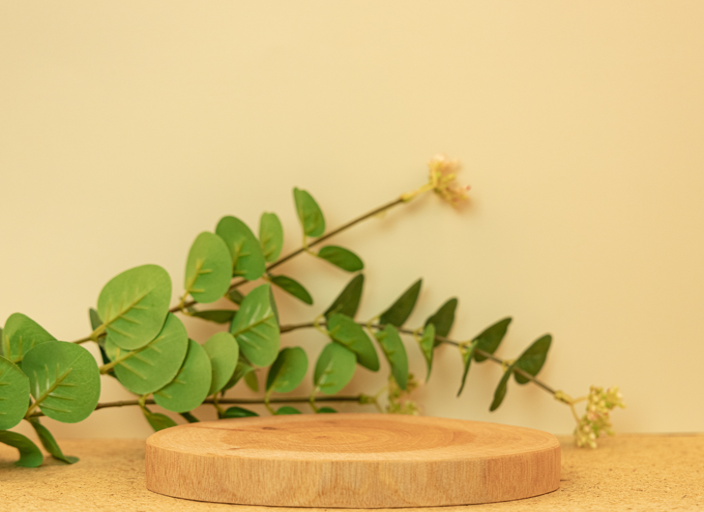

In [30]:
from utils import *
from PIL import Image

init_image = Image.open("/media/mlfavorfit/sdb/favorfit_templates/templates/180/1000.jpg").convert("RGB")
init_image = resize_store_ratio(init_image, 512)
init_image = init_image.resize((round(cur/64) * 64 for cur in init_image.size))
canny_image = make_canny_condition(init_image)
width, height = init_image.size
init_image

In [58]:
positice_prompt2 = "natural materials, clean 3 d render, raytraced 3d set design, raytracing shadows, image on the store website, natural materials :: high detail, behance. polished, trending on textures. com, clean 3 d render, raytraced 3d set design, raytracing shadows, image on the store website"
test_prompt = "vivid, clean, masterpiece, bestquality, ultra-detailed, studio photography, realistic, Photography, RAW photo, volumetric lighting"
test_negative_prompt = "watermark, text, (depth of field:1.4),(bokeh:1.31),(blurry:1.4),(worst quality:1.4),(low quality:1.4),(monochrome:1.1),Sketch,ng_deepnegative_v1_75t,(nsfw:1.21),tattoo,(beard:1.3),(EasyNegative:1.3),badhandv4,(Teeth:1.3),(worst quality:2),(low quality:2),(normal quality:2),lowers,normal quality,facing away,looking away,text,error,extra digit,fewer digits,cropped,jpeg artifacts,signature,watermark,username,blurry,skin spots,acnes,skin blemishes,bad anatomy,fat,bad feet,cropped,poorly drawn hands,poorly drawn face,mutation,deformed,tilted head.bad anatomy.bad hands,extra fingers,fewer digits.,extra limbs.extra arms,extra legs,malformed limbs.fused fingers.,too many fingers,long neck,cross-eyed,mutated hands,bad body,bad proportions,gross proportions,text,error,missing fingers,missing arms,missing legs,extra digit,extra arms,extra leg,extra foot,missing fingers"
caption = clip_image_to_text.inference(init_image, clip_model, mode="simple" ,remove_color=True)

# test_negative_prompt = ", (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation, visible skin, (((necklace))) exposed chest, large breasts, big breasts,hair, fur, split in the middle, (worst quality, low quality:2), NSFW, monochrome, zombie, overexposure, watermark, text, bad anatomy, bad hand, extra hands, extra fingers, too many fingers, fused fingers, bad arm, distorted arm, extra arms, fused arms, extra legs, missing leg, disembodied leg, extra nipples, detached arm, liquid hand, inverted hand, disembodied limb, oversized head, extra body, extra navel, (hair between eyes),sketch, duplicate, ugly, huge eyes, text, logo, worst face, (bad and mutated hands:1.3), (blurry:2.0), horror, geometry, bad_prompt, (bad hands), (missing fingers), multiple limbs, bad anatomy, (interlocked fingers:1.2), Ugly Fingers, (extra digit and hands and fingers and legs and arms: 1.4), (deformed fingers: 1.2), (long fingers:1.2),(bad-artist-anime), bad-artist, bad hand, extra legs, close up, cropped, blurry, unbalanced"

prompt = "red" + positice_prompt2
negative_prompt = "blurry, low quality, worst quality, wrinkled, deformed, distorted, jpeg artifacts, nsfw, paintings, sketches, text, watermark, username, spikey"
concept = ["minimalism", "3d render", "modernism"]
prompt_color_blocks = ["red theme", "pink theme", "orange theme", "yellow theme", "brown theme", "turquoise theme", "green theme", "blue theme", "purple theme", "black theme", "white theme"]

# test_prompt = "45 megapixel, ethereal beauty of a mystical landscape under the green moonlight, The scene should be illuminated by a large, radiant moon, casting its glow upon a twisted, yet majestic tree with blossoms that seem to sparkle in the night, The treeâs roots should be deeply embedded into rocky terrain, symbolizing its ancient existence. In the background, towering mountains loom, their peaks veiled in mist, A serene lake at the foot of the mountains reflects the moonâs luminescence, Incorporate elements that evoke a sense of magic and mystery, limitless lights in the air"
# test_negative_prompt = "bad quality, bad anatomy, worst quality, low quality, low resolution, extra fingers, blur, blurry, ugly, wrong proportions, watermark, image artifacts, lowres, ugly,  jpeg artifacts, deformed, noisy image, deformation, skin moles"

prompt = test_prompt
negative_prompt = test_negative_prompt

In [59]:
import random

prior_pipeline = prior_pipeline.to("cuda")
pipeline = pipeline.to("cuda")

generator = torch.Generator(device="cuda").manual_seed(random.randint(0,10000))

with torch.autocast("cuda", torch.float16):
    prior_output = prior_pipeline(
        prompt=f"{{FavorfitStyle}}, {prompt_color_blocks[0]}, {test_prompt}, {positice_prompt2}",
        negative_prompt=negative_prompt, 
        generator=generator,
    )

    generated_image = pipeline(
        image=init_image,
        control_image=canny_image,
        **prior_output,
        height=height,
        width=width,
        num_inference_steps=50,
        strength=1.0,
        guidance_scale=2.0,
        controlnet_scale=1.0,
        generator=generator,
    ).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. com, clean 3 d render, raytraced 3 d set design, raytracing shadows, image on the store website <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|en

100%|██████████| 50/50 [00:05<00:00,  8.67it/s]


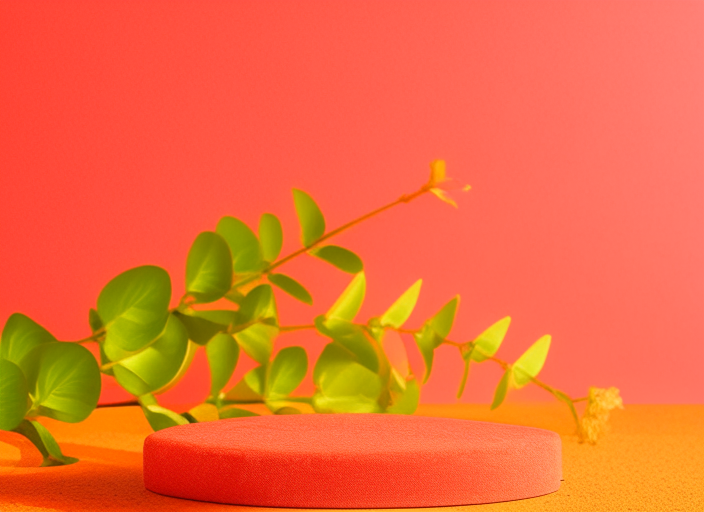

In [60]:
generated_image

In [111]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.001),  # 밝기, 대조, 채도, 색조를 랜덤으로 조절합니다.
    # 다른 필요한 변환들을 여기에 추가할 수 있습니다.
])

In [112]:
from PIL import Image

init_image = Image.open("/media/mlfavorfit/sdb/favorfit_templates/templates/180/1000.jpg").convert("RGB")

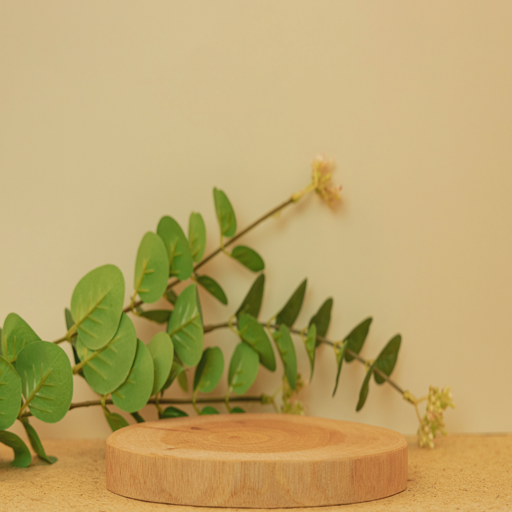

In [119]:
transform(init_image).resize([512,512])

In [1]:
temp_path ="/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-prior"

In [2]:
from transformers import CLIPTextModelWithProjection
text_encoder = CLIPTextModelWithProjection.from_pretrained(
        temp_path, subfolder="text_encoder"
    )

/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
text_encoder.requires_grad_(True)

text_encoder.text_model.encoder.requires_grad_(False)
text_encoder.text_model.final_layer_norm.requires_grad_(False)
text_encoder.text_model.embeddings.position_embedding.requires_grad_(False)

Embedding(77, 1280)

In [33]:
type(text_encoder)

transformers.models.clip.modeling_clip.CLIPTextModelWithProjection

In [29]:
text_inversion_layers = filter(lambda p: p.requires_grad, text_encoder.parameters())

In [18]:
for cur in text_inversion_layers:
    print(type(cur))

<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>


In [9]:
import torch
from transformers import CLIPTextModelWithProjection
from diffusers import AutoPipelineForText2Image, PriorTransformer, UNet2DConditionModel

text_encoder = CLIPTextModelWithProjection.from_pretrained(
    "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-prior", 
    subfolder="text_encoder",
    torch_dtype=torch.float16
)

prior = PriorTransformer.from_pretrained(
    "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-prior",
    subfolder="prior",
    torch_dtype=torch.float16
)

unet = UNet2DConditionModel.from_pretrained(
    "/home/mlfavorfit/Desktop/lib_link/favorfit/kjg/0_model_weights/diffusion/Kandinsky/kandinsky-decoder",
    subfolder="unet", 
    torch_dtype=torch.float16
).eval()

pipeline = AutoPipelineForText2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder",
    prior_text_encoder=text_encoder,
    unet=unet,
    prior_prior=prior,
    torch_dtype=torch.float16,
)

Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  5.77it/s]


In [ ]:
 # run inference
generator = torch.Generator(device=accelerator.device)
if args.seed is not None:
generator = generator.manual_seed(args.seed)
images = []
for _ in range(args.num_validation_images):
images.append(
    pipeline(args.validation_prompt, num_inference_steps=30, generator=generator).images[0]
)

In [4]:
from transformers import pipeline

depth_estimator = pipeline("depth-estimation", device="cuda")

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extr

In [5]:
import os
from PIL import Image
from glob import glob
from tqdm import tqdm

fns = glob("/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_bad/images/*")
save_dir = "/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_bad/conditioning_images_depth"

for fn in tqdm(fns):
    try:
        img = Image.open(fn).convert("RGB")
        depth = depth_estimator(img)["depth"]
        depth.save(os.path.join(save_dir, os.path.basename(fn)))
    except Exception as e:
        print(e, fn)

  0%|          | 9/197967 [00:00<3:59:25, 13.78it/s]--- Logging error ---
Traceback (most recent call last):
  File "/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/runpy.py", l